In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [131]:
df=pd.read_csv('113.csv', sep = '\t', error_bad_lines=False)

In [31]:
df['R'].mean()

500.20448148148154

In [32]:
def statistics(l):
    
    l1 = np.array(l)
    
    statss = []
    
    maxH = np.max(l1)
    statss.append(maxH)
    print('max', maxH)
    
    minH = np.min(l1)
    statss.append(minH)
    print('min', minH)
    
    rannge = maxH - minH
    statss.append(rannge)
    print('range', rannge)
    
    varr = np.var(l1)
    statss.append(varr)
    print('variance', varr)
    
    standart_dev = varr ** 0.5
    statss.append(standart_dev)
    print('standart_deviation', standart_dev)
    
    meanH = np.mean(l1)
    statss.append(meanH)
    print('mean', meanH)
    
    cv = standart_dev/meanH
    statss.append(cv)
    print('coefficient of variation', cv)
    
    
    kurtosis = stats.kurtosis(l1)
    statss.append(kurtosis)
    print('kurtosis(3 central moment)', kurtosis)
    
    skeww = stats.skew(l1)
    statss.append(skeww)
    print('skew', skeww)
    
    percents = np.arange(1,100,1)
    percentil = np.percentile(l1, percents)
    print( 'percentil 1',  percentil[0])
    print( 'quartil 1',    percentil[24])
    print( 'median',       percentil[49])
    print( 'quartil 3',    percentil[74])
    print( 'percentil 99', percentil[len(percentil)-1] )
    statss.append(percentil[0])
    statss.append(percentil[24])
    statss.append(percentil[49])
    statss.append(percentil[74])
    statss.append(percentil[len(percentil)-1])
    
    iqr = percentil[74] - percentil[24]
    statss.append(iqr)
    print('interquartile range', iqr)
    
    midpoint = (percentil[74] + percentil[24])/2
    statss.append(midpoint)
    print('midhinge', midpoint)
    
    qcd = (iqr/2)/midpoint
    statss.append(qcd)
    print('quartile coefficient of dispersion', qcd)
    
    boxplot = []
    boxplot.append( ( (percentil[24]) - (1.5*iqr) ) )
    boxplot.append(percentil[24])
    boxplot.append(percentil[49])
    boxplot.append(percentil[74])
    boxplot.append( ( (percentil[74]) + (1.5*iqr) ) )
    
    plt.plot(percents,percentil)
    plt.grid(c='c', ls= '-',lw=0.3)
    
    
    return statss, percentil, boxplot
    

max 506.12
min 496.95
range 9.170000000000016
variance 1.7269225089163265
standart_deviation 1.3141242364846355
mean 500.20448148148154
coefficient of variation 0.0026271740560830756
kurtosis(3 central moment) 1.421420699078677
skew 0.7424710490055687
percentil 1 497.6346
quartil 1 499.32
median 500.11
quartil 3 500.8475
percentil 99 503.6645
interquartile range 1.5275000000000318
midhinge 500.08375
quartile coefficient of dispersion 0.0015272441865987764


([506.12,
  496.95,
  9.170000000000016,
  1.7269225089163265,
  1.3141242364846355,
  500.20448148148154,
  0.0026271740560830756,
  1.421420699078677,
  0.7424710490055687,
  497.6346,
  499.32,
  500.11,
  500.8475,
  503.6645,
  1.5275000000000318,
  500.08375,
  0.0015272441865987764],
 array([497.6346, 497.966 , 498.1628, 498.2076, 498.3435, 498.4428,
        498.48  , 498.5204, 498.5321, 498.567 , 498.6059, 498.6752,
        498.8979, 498.9332, 498.957 , 499.022 , 499.07  , 499.1084,
        499.1722, 499.2   , 499.2349, 499.2518, 499.2687, 499.3056,
        499.32  , 499.33  , 499.3526, 499.3732, 499.4002, 499.44  ,
        499.5478, 499.564 , 499.62  , 499.6792, 499.71  , 499.72  ,
        499.7606, 499.79  , 499.7991, 499.822 , 499.84  , 499.85  ,
        499.87  , 499.9372, 499.9605, 499.9948, 500.0229, 500.0512,
        500.0762, 500.11  , 500.1319, 500.1488, 500.1614, 500.2026,
        500.249 , 500.2564, 500.2933, 500.3102, 500.3371, 500.35  ,
        500.38  , 500.39  , 

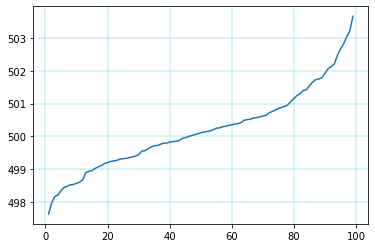

In [33]:
statistics(df['R'])

In [ ]:
#ну построить гистограмму наверное красиво перцентили мб посмотреть какая тогда погрешность асолютная и абсолютная
#но выглядит что они вполне себе применнимы камон всего 1.5 ома межквартильное расстояние

max 506.12
min 496.95
range 9.170000000000016
variance 1.7269225089163265
standart_deviation 1.3141242364846355
mean 500.20448148148154
coefficient of variation 0.0026271740560830756
kurtosis(3 central moment) 1.421420699078677
skew 0.7424710490055687
percentil 1 497.6346
quartil 1 499.32
median 500.11
quartil 3 500.8475
percentil 99 503.6645
interquartile range 1.5275000000000318
midhinge 500.08375
quartile coefficient of dispersion 0.0015272441865987764


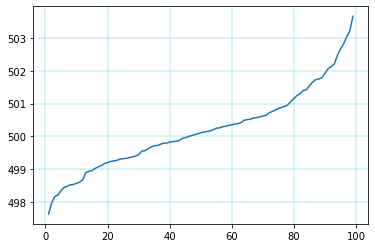

In [34]:
s, p, b = statistics(df['R'])

100

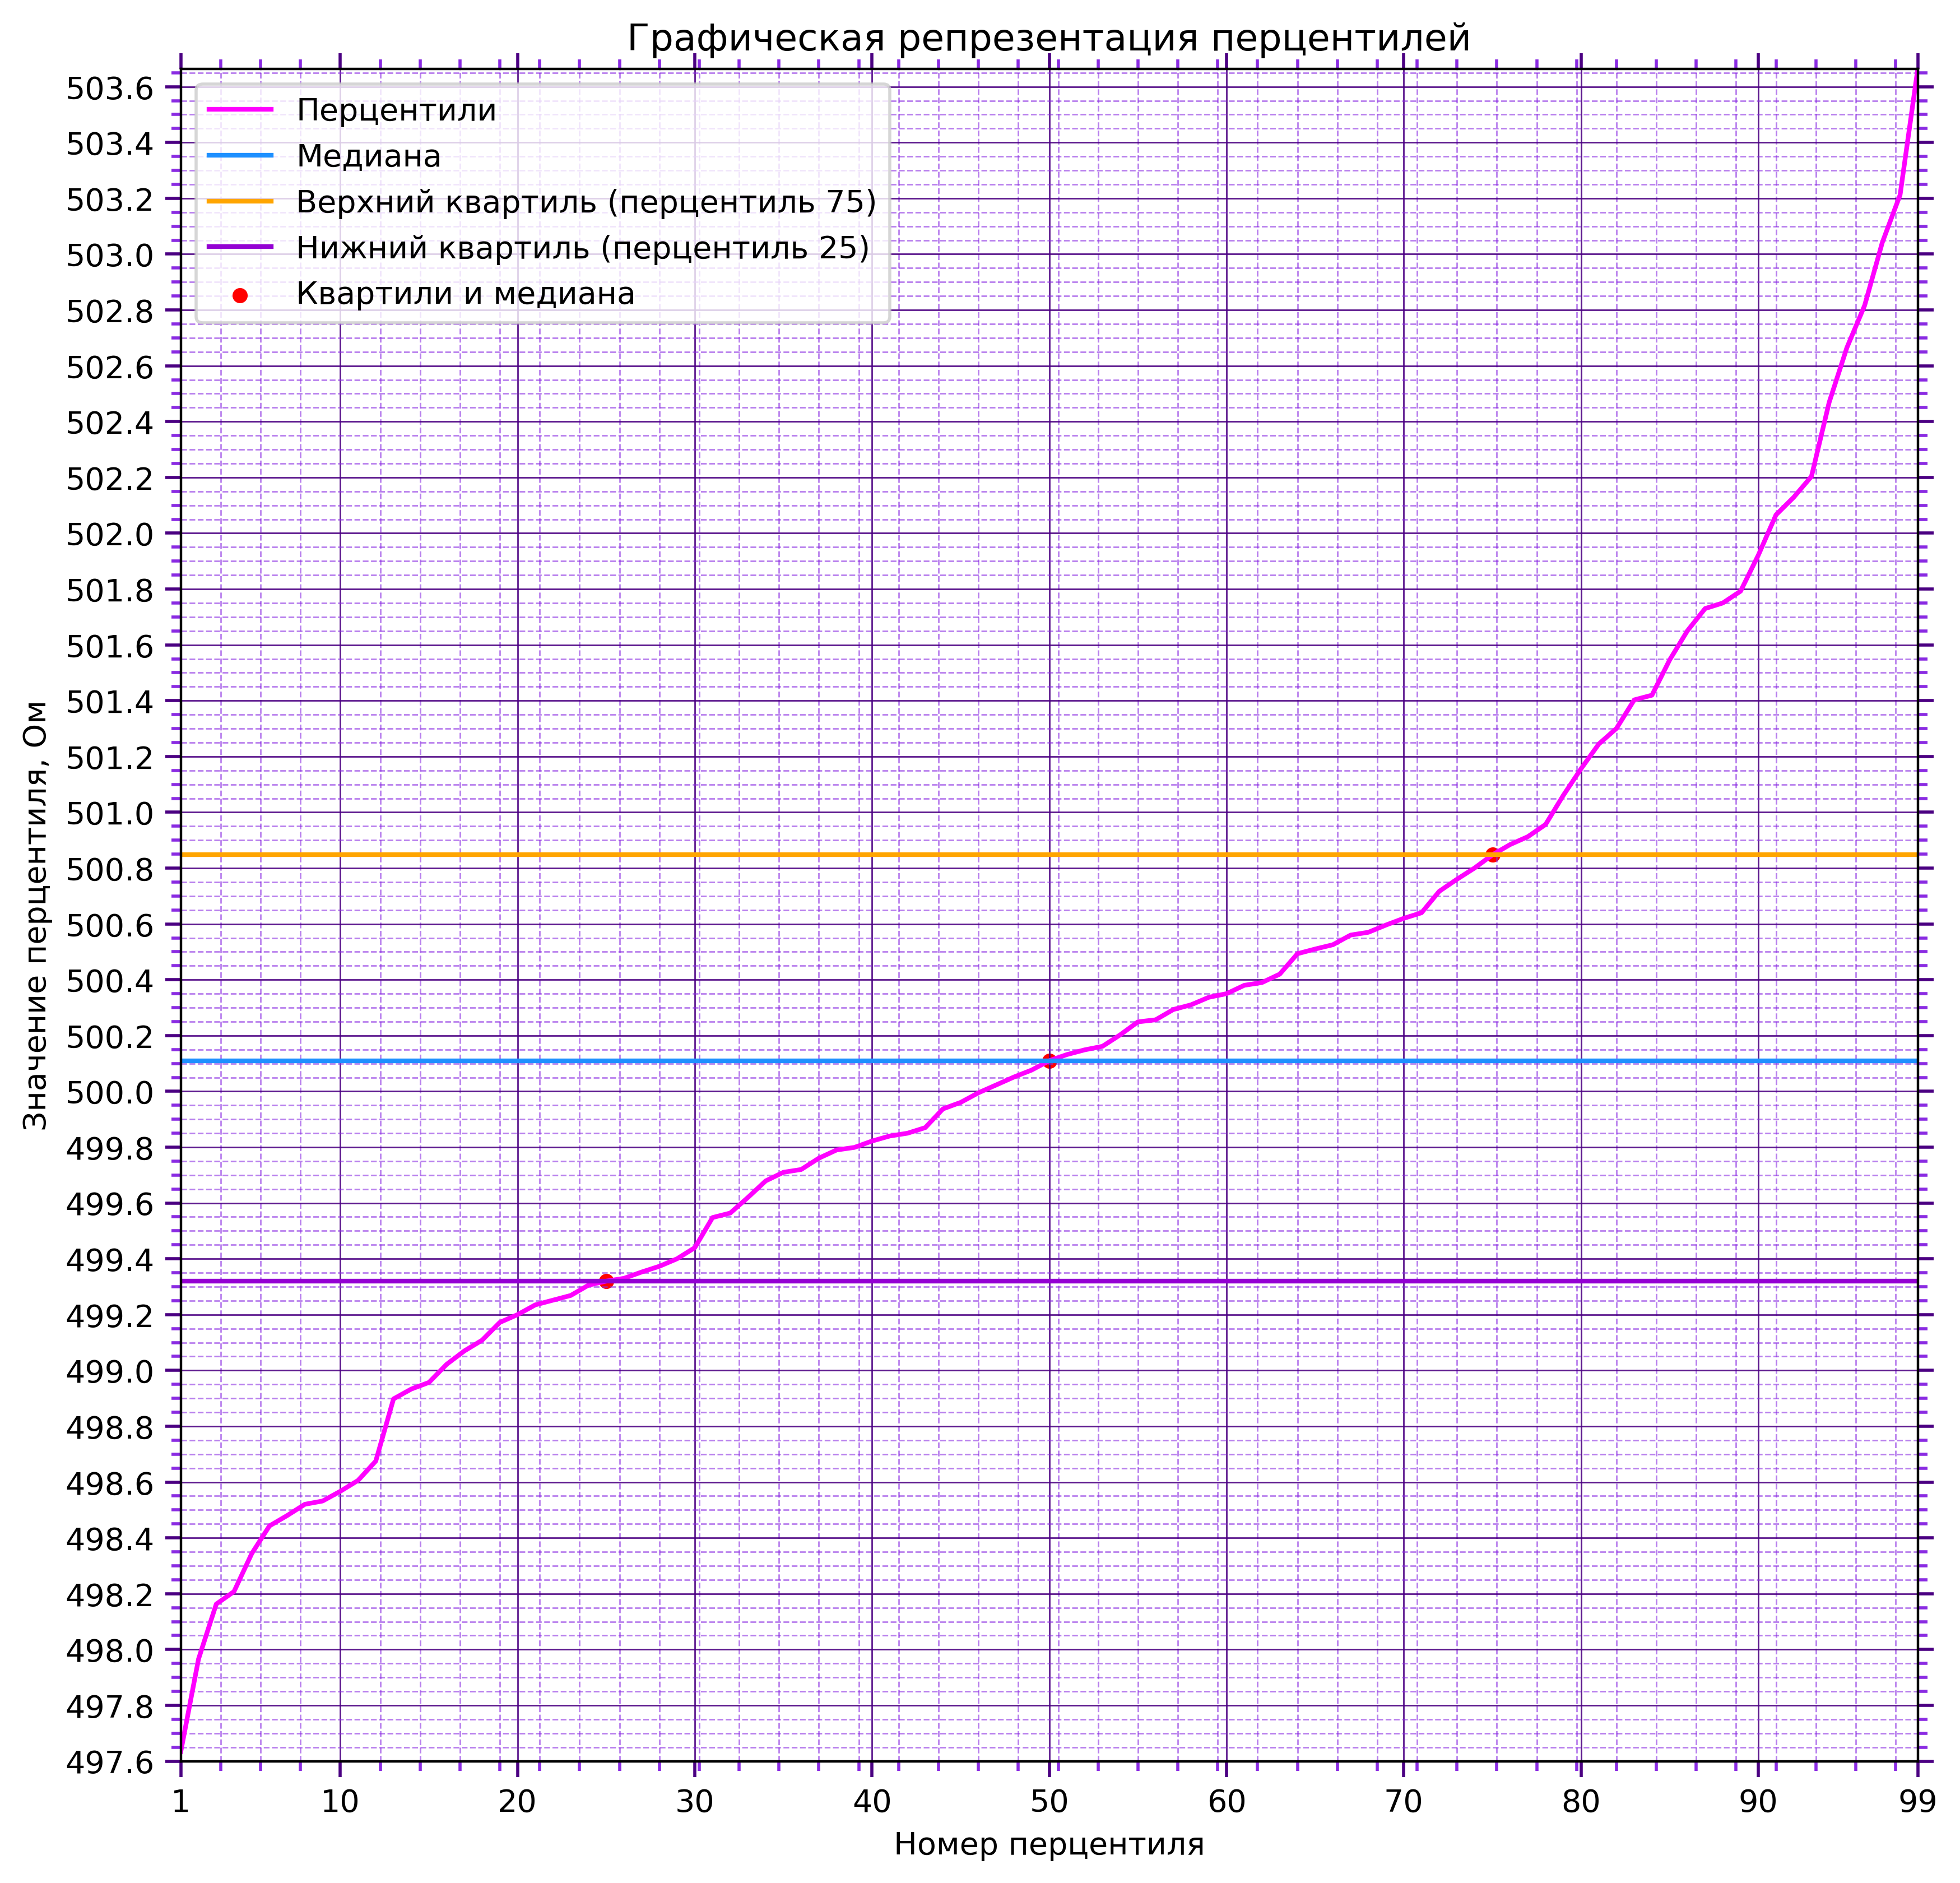

In [65]:
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.plot( [i for i in range(1,100)], p, color = 'magenta', label = 'Перцентили')

plt.scatter( [25, 50, 75], [p[24], p[49], p[74]] , s = 15, color = 'red', label = 'Квартили и медиана')

plt.plot([i for i in range(1,100)], [p[49] for i in range(1,100)], color = 'dodgerblue', label = 'Медиана')

plt.plot([i for i in range(1,100)], [p[74] for i in range(1,100)], color = 'orange', label = 'Верхний квартиль (перцентиль 75)')
plt.plot([i for i in range(1,100)], [p[24] for i in range(1,100)], color = 'darkviolet', label = 'Нижний квартиль (перцентиль 25)')

#plt.xscale('log')

plt.xlim(1, 99)
plt.ylim(p[0], p[98] )

plt.xticks(np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]))
plt.yticks(np.arange(round(np.min(np.array(p)), 1), round(( np.max(np.array(p) ) + 0.1 ), 1), 0.2))


        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 3, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Значение перцентиля, Ом')
plt.xlabel('Номер перцентиля')

plt.title('Графическая репрезентация перцентилей', loc = 'center')

plt.legend()

#ax = fig.add_subplot(111)

#ax.patch.set_facecolor('k')
#ax.patch.set_alpha(1.0)





plt.savefig('113_p.png', dpi = 450)

In [68]:
import seaborn as sns


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


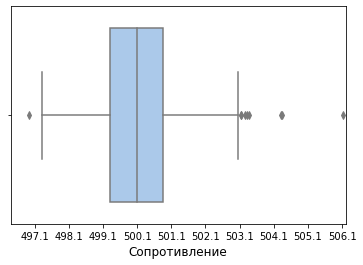

In [149]:
ax = sns.boxplot(df['R'], palette = 'pastel')
plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df['R']))  - 0.5), 1),  round(( np.max(np.array(df['R']) ) + 0.1 ), 1))
plt.xticks(np.arange(round( ( np.min(np.array(p))  - 0.5), 1), round(( np.max(np.array(df['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('box1.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


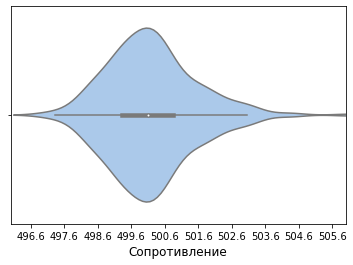

In [106]:
ax = sns.violinplot(df['R'], palette = 'pastel')

plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df['R']))  - 1), 1), (round(( np.max(np.array(df['R']))  + 0.1))) )
plt.xticks(np.arange(round( ( np.min(np.array(p))  - 1), 1), round(( np.max(np.array(df['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('violin1.png')

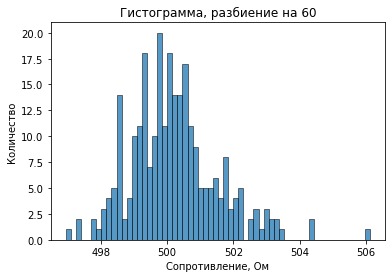

In [114]:
ax = sns.histplot(df['R'], palette = 'pastel', bins = 60, legend = True)

plt.xlabel('Сопротивление, Ом')

plt.ylabel('Количество')

plt.title('Гистограмма, разбиение на 60', loc = 'center')

fig = ax.get_figure()
fig.savefig('hist60.png')


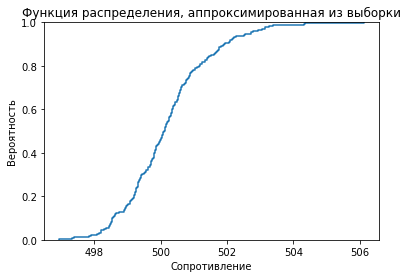

In [116]:
ax = sns.ecdfplot(df['R'], palette = 'pastel', legend = True)

plt.xlabel('Сопротивление')

plt.ylabel('Вероятность')

plt.title('Функция распределения, аппроксимированная из выборки', loc = 'center')

fig = ax.get_figure()
fig.savefig('ecdf.png')

In [ ]:
# ну лютый выброс 506. предлагаю по iqr решить пределы, не 1.5 а побобше, убрать выбросы, посчитать среднее и определеить по данной выборке погрешность.
# ну и по всей но так точнее
#затем по выборке вики посчитать сравнить
#затем по общей и посмотреть


In [118]:
b[4]

503.1387500000001

In [171]:
df_1 = df

In [177]:
mean_r2 = np.mean(np.array(df_1['R']))

In [178]:
mean_r2

500.1513857677903

In [174]:
mean_r1 = np.mean(np.array(df['R']))

In [175]:
mean_r1

500.20448148148154

In [142]:
df.head()

,R
0,502.72
1,496.95
2,500.76
3,499.27
4,497.33


In [188]:
df_3 = pd.read_csv('113_2.csv', sep = '\t', error_bad_lines=False)

In [145]:
mean_r3 = np.mean(np.array(df_3['R']))

In [146]:
mean_r3

500.04546296296303

In [176]:
#df_1 = df_1.loc[df_1['R'] > p[1]]
df_1 = df_1.loc[df_1['R'] < p[98]]

503.6645

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


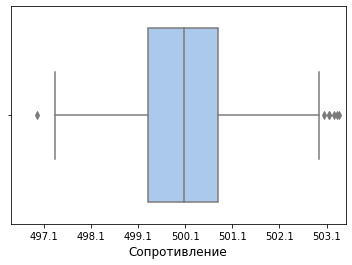

In [182]:
ax = sns.boxplot(df_1['R'], palette = 'pastel')
plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df_1['R']))  - 0.5), 1),  round(( np.max(np.array(df_1['R']) ) + 0.1 ), 1))
plt.xticks(np.arange(round( ( np.min(np.array(p1))  - 0.5), 1), round(( np.max(np.array(df_1['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('box2.png')

max 503.37
min 496.95
range 6.420000000000016
variance 1.4846448961270342
standart_deviation 1.2184600511001722
mean 500.1513857677903
coefficient of variation 0.0024361824954852317
kurtosis(3 central moment) 0.029427214833145587
skew 0.3523148120363468
percentil 1 497.6244
quartil 1 499.315
median 500.08
quartil 3 500.805
percentil 99 503.18399999999997
interquartile range 1.490000000000009
midhinge 500.06
quartile coefficient of dispersion 0.0014898212214534347


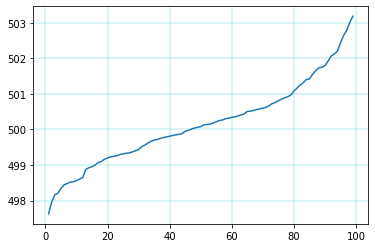

In [179]:
s1, p1, b1 = statistics(df_1['R'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


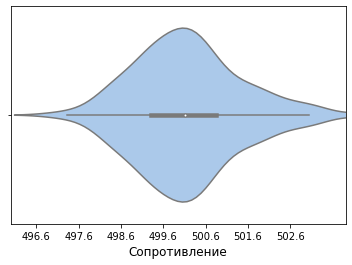

In [184]:
ax = sns.violinplot(df['R'], palette = 'pastel')

plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df_1['R']))  - 1), 1), (round(( np.max(np.array(df_1['R']))  + 0.5), 1)) )
plt.xticks(np.arange(round( ( np.min(np.array(p1))  - 1), 1), round(( np.max(np.array(df_1['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('violin2.png')

In [185]:
df_v = pd.read_csv('113_v.csv', sep = '\t', error_bad_lines=False)

max 505.31
min 497.38
range 7.930000000000007
variance 1.3341443950617287
standart_deviation 1.155051685017484
mean 499.8864444444445
coefficient of variation 0.002310628139359062
kurtosis(3 central moment) 1.7107846232860648
skew 0.8060603999223152
percentil 1 497.8607
quartil 1 499.1425
median 499.905
quartil 3 500.48
percentil 99 503.15270000000004
interquartile range 1.337500000000034
midhinge 499.81125
quartile coefficient of dispersion 0.001338005096924123


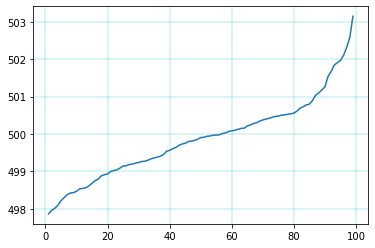

In [187]:
s2, p2, b2 = statistics(df_v['R'])

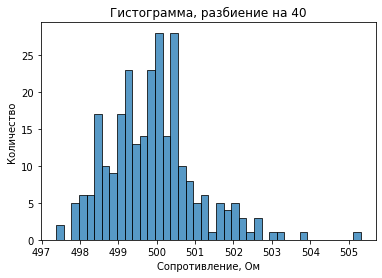

In [190]:
ax = sns.histplot(df_v['R'], palette = 'pastel', bins = 40, legend = True)

plt.xlabel('Сопротивление, Ом')

plt.ylabel('Количество')

plt.title('Гистограмма, разбиение на 40', loc = 'center')

fig = ax.get_figure()
fig.savefig('hist40v.png')

In [200]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       540 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [203]:
1.2473252748264392/500.04546296296303

0.0024944237418644973

In [204]:
6.12/500

0.012240000000000001

In [205]:
(510 - 496.95)/510

0.02558823529411767

max 506.12
min 496.95
range 9.170000000000016
variance 1.5558203412208518
standart_deviation 1.2473252748264392
mean 500.04546296296303
coefficient of variation 0.0024944237418644973
kurtosis(3 central moment) 1.6100831838592855
skew 0.8024464249428236
percentil 1 497.779
quartil 1 499.22
median 499.97
quartil 3 500.6025
percentil 99 503.3466
interquartile range 1.3824999999999932
midhinge 499.91125
quartile coefficient of dispersion 0.0013827454373151165


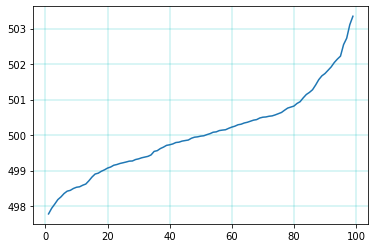

In [199]:
s3, p3, b3 = statistics(df_3['R'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


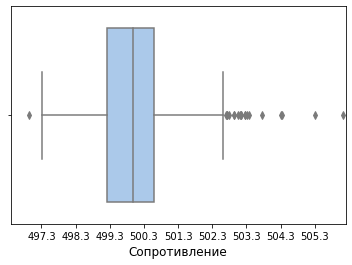

In [198]:
ax = sns.boxplot(df_3['R'], palette = 'pastel')
plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df_3['R']))  - 0.5), 1),  round(( np.max(np.array(df_3['R']) ) + 0.1 ), 1))
plt.xticks(np.arange(round( ( np.min(np.array(p3))  - 0.5), 1), round(( np.max(np.array(df_3['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('box3.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


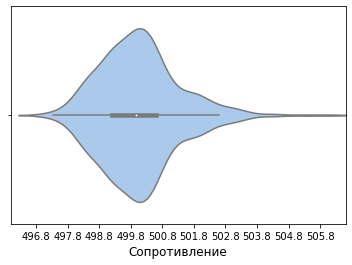

In [196]:
ax = sns.violinplot(df_3['R'], palette = 'pastel')

plt.xlabel('Сопротивление', fontsize=12)
plt.xlim(round( ( np.min(np.array(df_3['R']))  - 1), 1), (round(( np.max(np.array(df_3['R']))  + 0.5), 1)) )
plt.xticks(np.arange(round( ( np.min(np.array(p3))  - 1), 1), round(( np.max(np.array(df_3['R']) ) + 0.1 ), 1), 1))

fig = ax.get_figure()
fig.savefig('violin3.png')

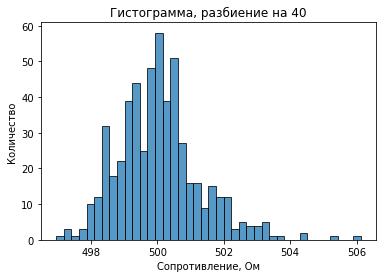

In [197]:
ax = sns.histplot(df_3['R'], palette = 'pastel', bins = 40, legend = True)

plt.xlabel('Сопротивление, Ом')

plt.ylabel('Количество')

plt.title('Гистограмма, разбиение на 40', loc = 'center')

fig = ax.get_figure()
fig.savefig('hist403.png')

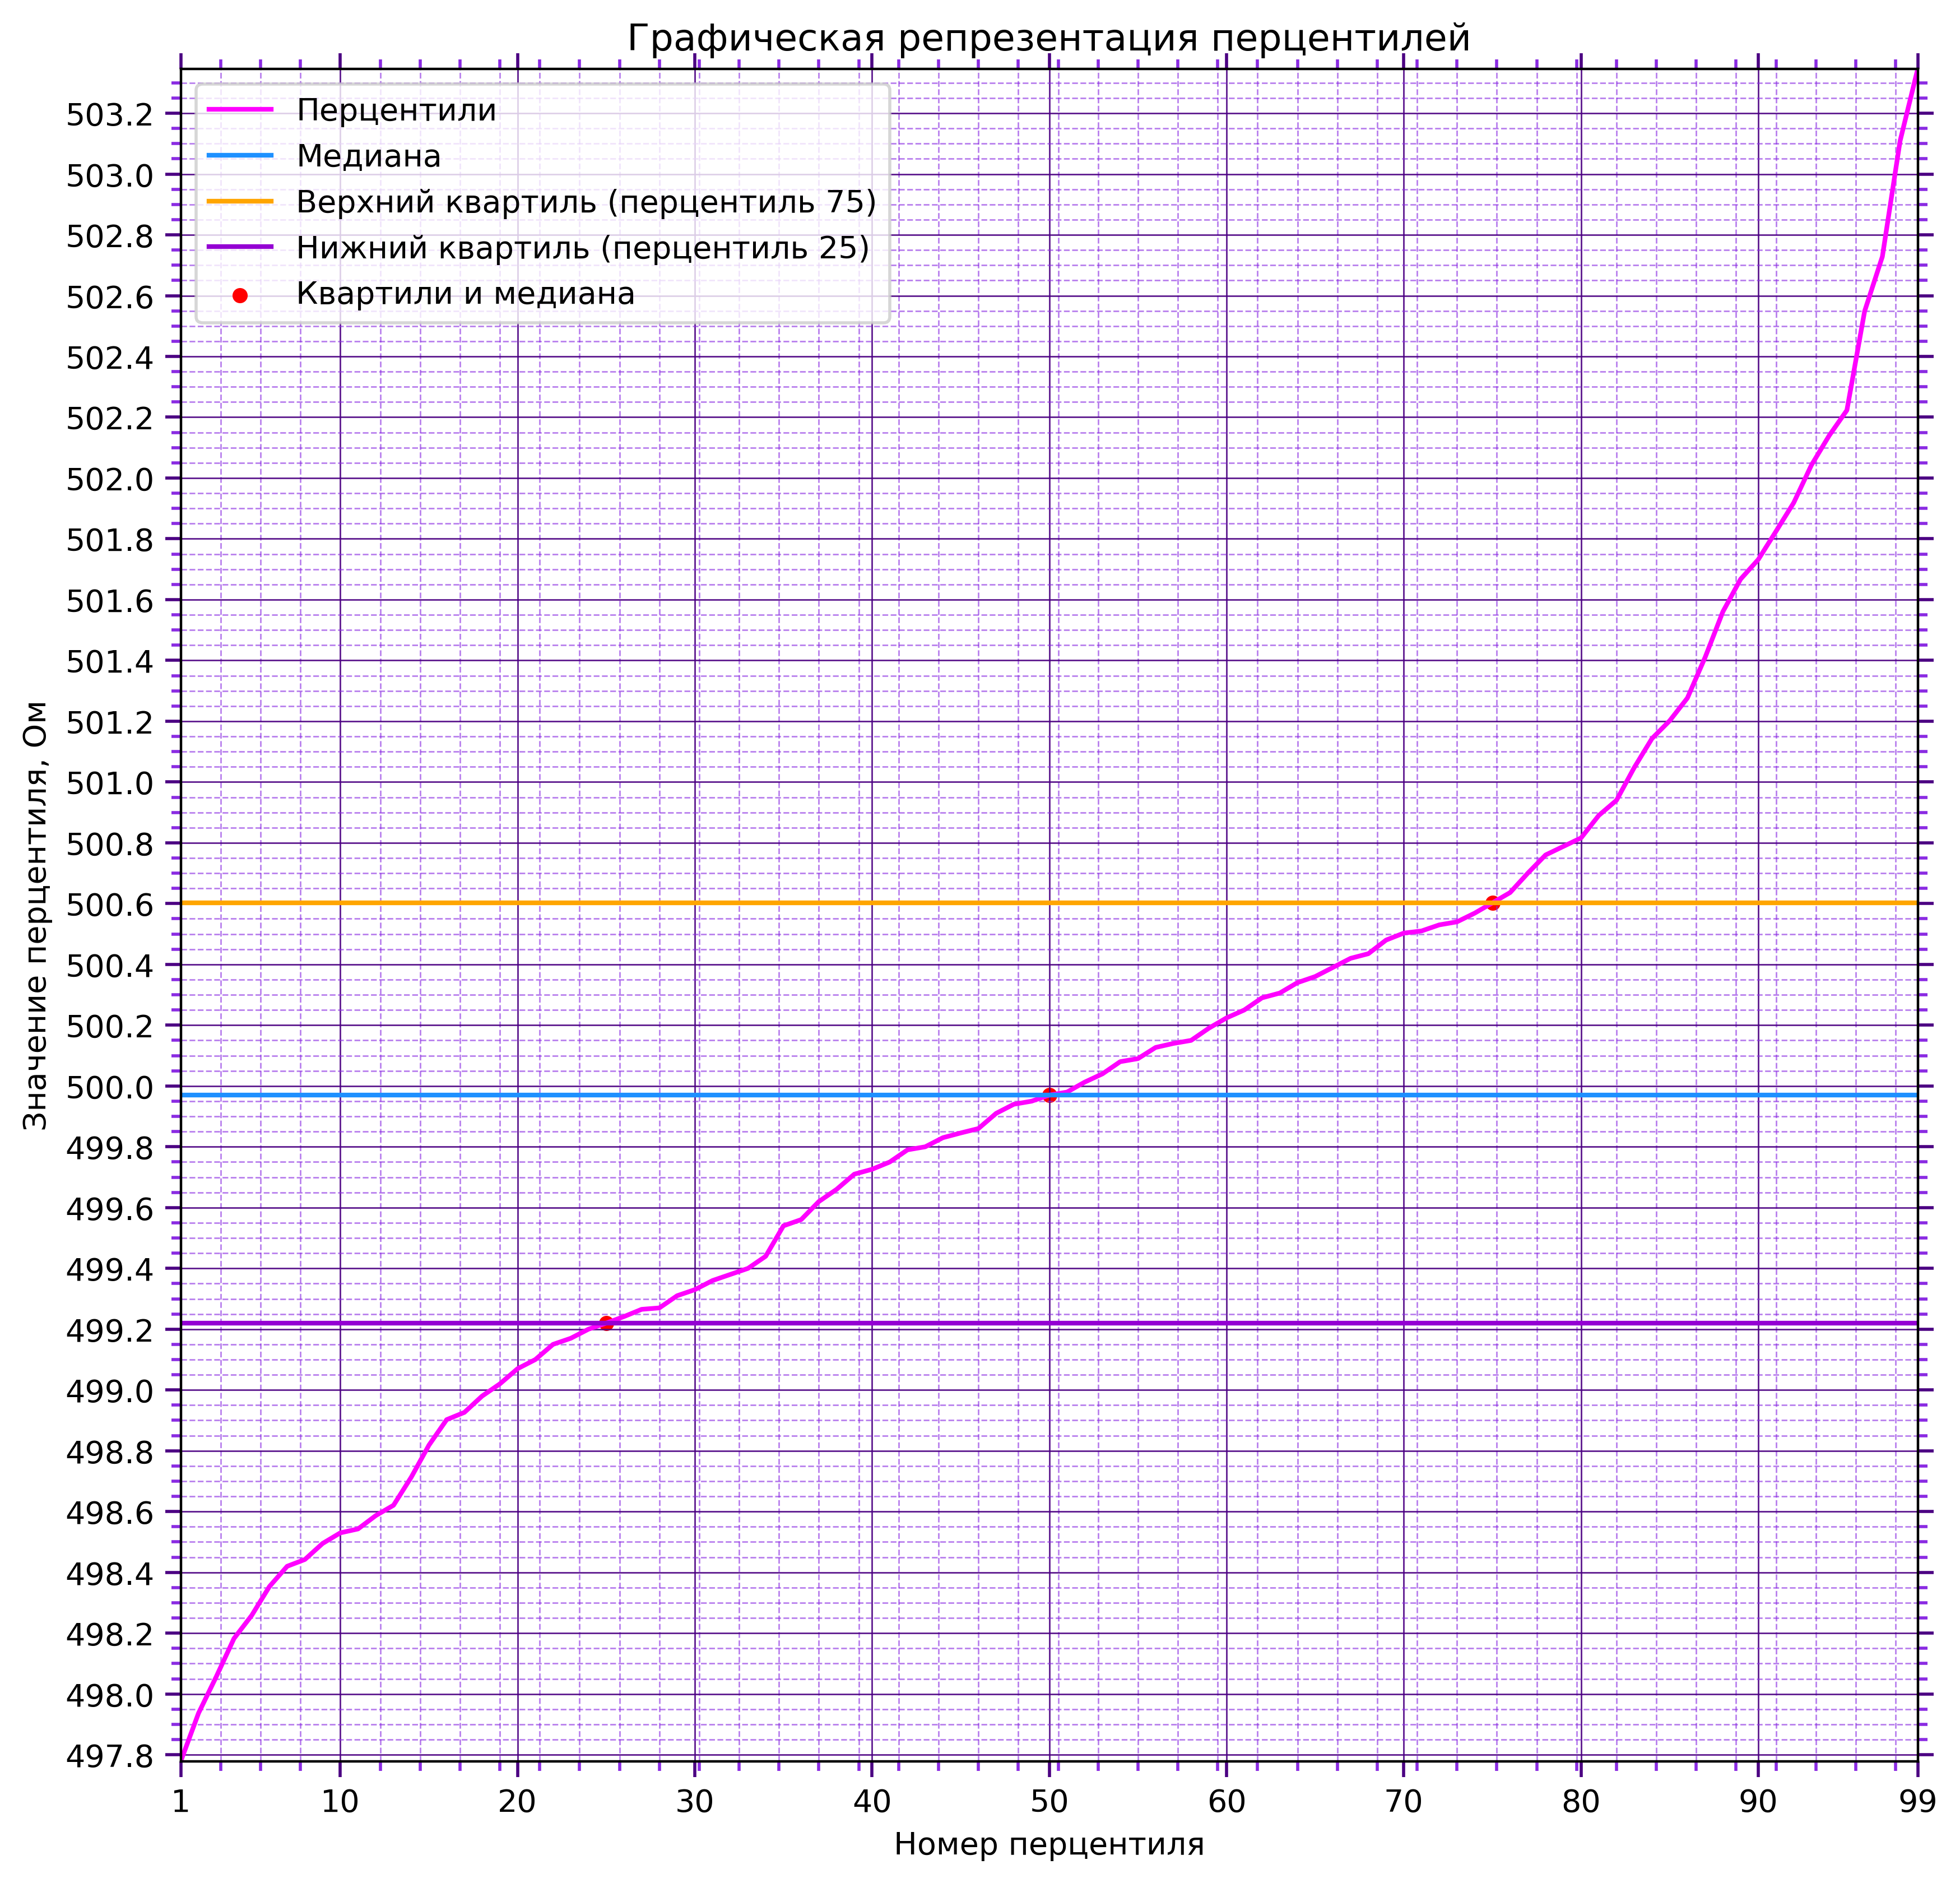

In [202]:
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.plot( [i for i in range(1,100)], p3, color = 'magenta', label = 'Перцентили')

plt.scatter( [25, 50, 75], [p3[24], p3[49], p3[74]] , s = 15, color = 'red', label = 'Квартили и медиана')

plt.plot([i for i in range(1,100)], [p3[49] for i in range(1,100)], color = 'dodgerblue', label = 'Медиана')

plt.plot([i for i in range(1,100)], [p3[74] for i in range(1,100)], color = 'orange', label = 'Верхний квартиль (перцентиль 75)')
plt.plot([i for i in range(1,100)], [p3[24] for i in range(1,100)], color = 'darkviolet', label = 'Нижний квартиль (перцентиль 25)')

#plt.xscale('log')

plt.xlim(1, 99)
plt.ylim(p3[0], p3[98] )

plt.xticks(np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]))
plt.yticks(np.arange(round(np.min(np.array(p3)), 1), round(( np.max(np.array(p3) ) + 0.1 ), 1), 0.2))


        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 3, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Значение перцентиля, Ом')
plt.xlabel('Номер перцентиля')

plt.title('Графическая репрезентация перцентилей', loc = 'center')

plt.legend()

#ax = fig.add_subplot(111)

#ax.patch.set_facecolor('k')
#ax.patch.set_alpha(1.0)





plt.savefig('113_p3.png', dpi = 450)

In [206]:
df_test = df_3

In [207]:
df_test = df_test.loc[df_test['R'] >(500.05 - 1.25) ]
df_test = df_test.loc[df_test['R'] < (500.05 + 1.25)]

In [208]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 2 to 539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       385 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [209]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       540 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [210]:
385/540

0.7129629629629629

In [211]:
df_test2 = df_3

In [212]:
df_test2 = df_test2.loc[df_test2['R'] >(500.05 - 2.5) ]
df_test2 = df_test2.loc[df_test2['R'] < (500.05 + 2.5)]

In [213]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 2 to 539
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       513 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [214]:
513/540

0.95